# Miembros de las Expediciones

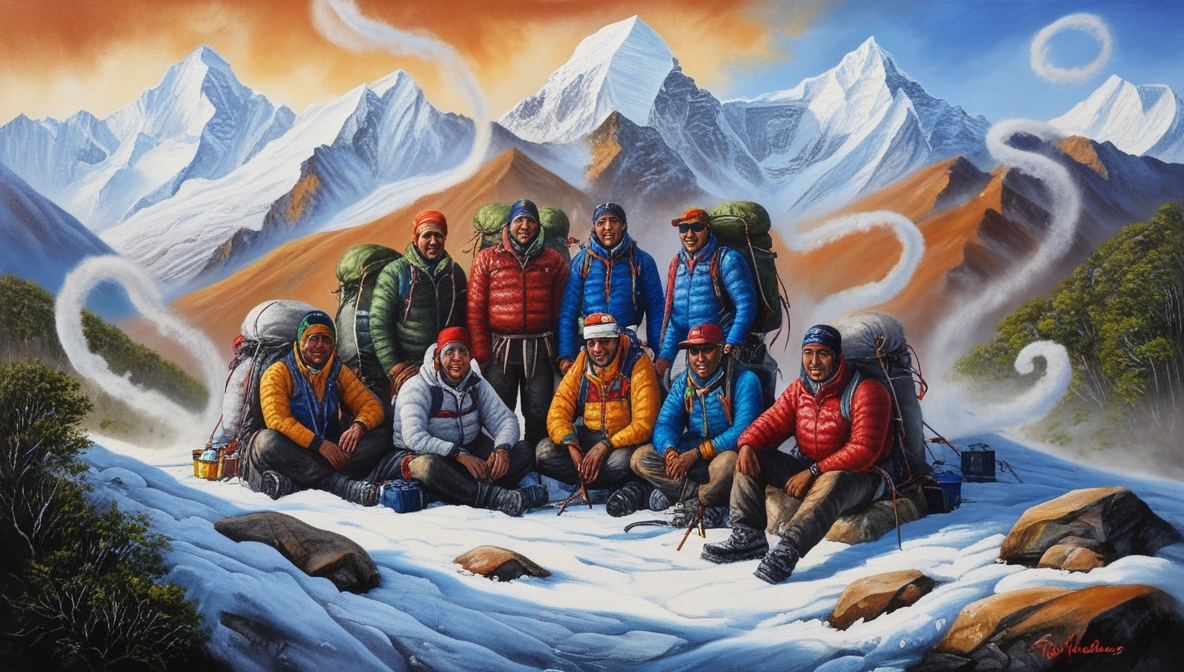

### Presentación de variables

**expedition_id**: Identificación única de la expedición. 

**member_id**: Identificación única del miembro participante en la expedición.

**peak_id**: Identificación única del pico de la montaña. 

**peak_name**: Nombre del pico al que se refiere la expedición.

**year**: Año en el que tuvo lugar la expedición.

**season**: Temporada en la que se realizó la expedición (por ejemplo, primavera, verano, etc.).

**sex**: Género del miembro participante.

**age**: Edad del miembro participante en el momento de la expedición.

**citizenship**: Nacionalidad del miembro participante.

**expedition_role**: Rol o función desempeñada por el miembro en la expedición.

**hired**: Indicador de si el miembro fue contratado para la expedición.

**highpoint_metres**: Altura máxima alcanzada en metros durante la expedición.

**success**: Indicador de éxito de la expedición.

**solo**: Indicador de si la expedición fue realizada en solitario.

**oxygen_used**: Indicador de si se utilizó oxígeno suplementario durante la expedición.

**died**: Indicador de si hubo una muerte durante la expedición.

**death_cause**: Causa de la muerte si ocurrió durante la expedición.

**death_height_metres**: Altura en metros en la que ocurrió la muerte durante la expedición.

**injured**: Indicador de si hubo lesiones durante la expedición.

**injury_type**: Tipo de lesión sufrida durante la expedición.

**injury_height_metres**: Altura en metros en la que ocurrió la lesión durante la expedición.

### 1. Empezamos lectura y preprocesamiento de datos.

In [59]:
# Importamos librerías
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import folium
from scipy.stats import shapiro
from scipy.stats import chi2_contingency
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from PIL import Image

In [60]:
# Leemos el dataset
members = pd.read_csv('members.csv')

### 1.1 Información del dataset

In [61]:
# Observamos nuestro dataset
members

,expedition_id,member_id,peak_id,peak_name,year,season,sex,age,citizenship,expedition_role,...,highpoint_metres,success,solo,oxygen_used,died,death_cause,death_height_metres,injured,injury_type,injury_height_metres
0,AMAD78301,AMAD78301-01,AMAD,Ama Dablam,1978,Autumn,M,40.0,France,Leader,...,NaN,False,False,False,False,NaN,NaN,False,NaN,NaN
1,AMAD78301,AMAD78301-02,AMAD,Ama Dablam,1978,Autumn,M,41.0,France,Deputy Leader,...,6000.0,False,False,False,False,NaN,NaN,False,NaN,NaN
2,AMAD78301,AMAD78301-03,AMAD,Ama Dablam,1978,Autumn,M,27.0,France,Climber,...,NaN,False,False,False,False,NaN,NaN,False,NaN,NaN
3,AMAD78301,AMAD78301-04,AMAD,Ama Dablam,1978,Autumn,M,40.0,France,Exp Doctor,...,6000.0,False,False,False,False,NaN,NaN,False,NaN,NaN
4,AMAD78301,AMAD78301-05,AMAD,Ama Dablam,1978,Autumn,M,34.0,France,Climber,...,NaN,False,False,False,False,NaN,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76514,PUTH19101,PUTH19101-07,PUTH,Putha Hiunchuli,2019,Spring,M,44.0,Nepal,H-A Worker,...,6350.0,False,False,False,False,NaN,NaN,False,NaN,NaN
76515,RATC19101,RATC19101-01,RATC,Ratna Chuli,2019,Spring,M,55.0,Romania,Leader,...,6600.0,False,False,False,False,NaN,NaN,False,NaN,NaN
76516,SANK19101,SANK19101-01,SANK,Sano Kailash,2019,Spring,M,56.0,Austria,Leader,...,6452.0,True,False,False,False,NaN,NaN,False,NaN,NaN
76517,SANK19101,SANK19101-02,SANK,Sano Kailash,2019,Spring,F,57.0,Austria,Climber,...,5700.0,False,False,False,False,NaN,NaN,False,NaN,NaN


In [62]:
# Observamos el tamaño del dataframe
members.shape

(76519, 21)

In [63]:
# Vemos la información general
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76519 entries, 0 to 76518
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   expedition_id         76519 non-null  object 
 1   member_id             76519 non-null  object 
 2   peak_id               76519 non-null  object 
 3   peak_name             76504 non-null  object 
 4   year                  76519 non-null  int64  
 5   season                76519 non-null  object 
 6   sex                   76517 non-null  object 
 7   age                   73022 non-null  float64
 8   citizenship           76509 non-null  object 
 9   expedition_role       76498 non-null  object 
 10  hired                 76519 non-null  bool   
 11  highpoint_metres      54686 non-null  float64
 12  success               76519 non-null  bool   
 13  solo                  76519 non-null  bool   
 14  oxygen_used           76519 non-null  bool   
 15  died               

In [64]:
# Vemos nulos y graficamos
members.isnull().sum()

expedition_id               0
member_id                   0
peak_id                     0
peak_name                  15
year                        0
season                      0
sex                         2
age                      3497
citizenship                10
expedition_role            21
hired                       0
highpoint_metres        21833
success                     0
solo                        0
oxygen_used                 0
died                        0
death_cause             75413
death_height_metres     75451
injured                     0
injury_type             74807
injury_height_metres    75510
dtype: int64

<Axes: >

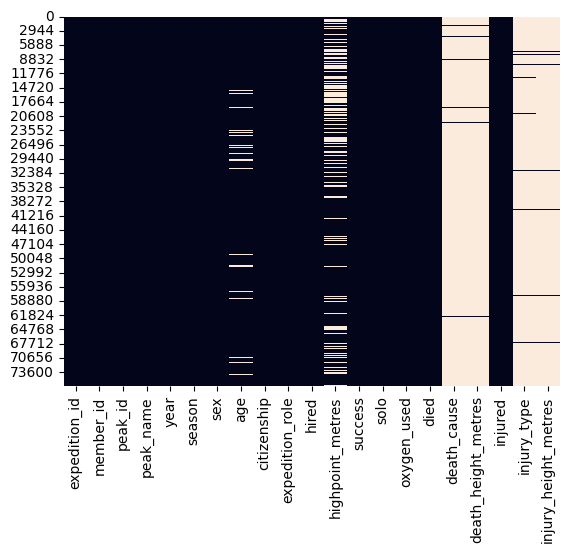

In [65]:
# Graficamos valores nulos
sns.heatmap(members.isnull(), cbar=False)

In [66]:
# Analizamos las variables numéricas
members.describe().T

,count,mean,std,min,25%,50%,75%,max
year,76519.0,2000.361714,14.780560,1905.0,1991.0,2004.0,2012.0,2019.0
age,73022.0,37.334297,10.395602,7.0,29.0,36.0,44.0,85.0
highpoint_metres,54686.0,7470.680759,1040.063830,3800.0,6700.0,7400.0,8400.0,8850.0
death_height_metres,1068.0,6592.850187,1308.186282,400.0,5800.0,6600.0,7550.0,8830.0
injury_height_metres,1009.0,7049.913776,1214.244710,400.0,6200.0,7100.0,8000.0,8880.0


### 2. Tratamiento de variables

In [67]:
members

,expedition_id,member_id,peak_id,peak_name,year,season,sex,age,citizenship,expedition_role,...,highpoint_metres,success,solo,oxygen_used,died,death_cause,death_height_metres,injured,injury_type,injury_height_metres
0,AMAD78301,AMAD78301-01,AMAD,Ama Dablam,1978,Autumn,M,40.0,France,Leader,...,NaN,False,False,False,False,NaN,NaN,False,NaN,NaN
1,AMAD78301,AMAD78301-02,AMAD,Ama Dablam,1978,Autumn,M,41.0,France,Deputy Leader,...,6000.0,False,False,False,False,NaN,NaN,False,NaN,NaN
2,AMAD78301,AMAD78301-03,AMAD,Ama Dablam,1978,Autumn,M,27.0,France,Climber,...,NaN,False,False,False,False,NaN,NaN,False,NaN,NaN
3,AMAD78301,AMAD78301-04,AMAD,Ama Dablam,1978,Autumn,M,40.0,France,Exp Doctor,...,6000.0,False,False,False,False,NaN,NaN,False,NaN,NaN
4,AMAD78301,AMAD78301-05,AMAD,Ama Dablam,1978,Autumn,M,34.0,France,Climber,...,NaN,False,False,False,False,NaN,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76514,PUTH19101,PUTH19101-07,PUTH,Putha Hiunchuli,2019,Spring,M,44.0,Nepal,H-A Worker,...,6350.0,False,False,False,False,NaN,NaN,False,NaN,NaN
76515,RATC19101,RATC19101-01,RATC,Ratna Chuli,2019,Spring,M,55.0,Romania,Leader,...,6600.0,False,False,False,False,NaN,NaN,False,NaN,NaN
76516,SANK19101,SANK19101-01,SANK,Sano Kailash,2019,Spring,M,56.0,Austria,Leader,...,6452.0,True,False,False,False,NaN,NaN,False,NaN,NaN
76517,SANK19101,SANK19101-02,SANK,Sano Kailash,2019,Spring,F,57.0,Austria,Climber,...,5700.0,False,False,False,False,NaN,NaN,False,NaN,NaN


In [68]:
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76519 entries, 0 to 76518
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   expedition_id         76519 non-null  object 
 1   member_id             76519 non-null  object 
 2   peak_id               76519 non-null  object 
 3   peak_name             76504 non-null  object 
 4   year                  76519 non-null  int64  
 5   season                76519 non-null  object 
 6   sex                   76517 non-null  object 
 7   age                   73022 non-null  float64
 8   citizenship           76509 non-null  object 
 9   expedition_role       76498 non-null  object 
 10  hired                 76519 non-null  bool   
 11  highpoint_metres      54686 non-null  float64
 12  success               76519 non-null  bool   
 13  solo                  76519 non-null  bool   
 14  oxygen_used           76519 non-null  bool   
 15  died               

### 2.1 Eliminamos nulos

In [69]:
# Usamos esta función para eliminar valores nulos
def quitar_nulos (df):
    for col in df.columns:
        if df[col].dtype == 'float64':
            df[col] = df[col].fillna(df[col].mean())
        elif df[col].dtype == 'object':
            df[col] = df[col].fillna(df[col].mode()[0])
        else:
            df[col] = df[col].fillna(df[col].median())
    return df

members = quitar_nulos (members)

In [70]:
# Revisamos de nuevo los valores nulos
members.isnull().sum()

expedition_id           0
member_id               0
peak_id                 0
peak_name               0
year                    0
season                  0
sex                     0
age                     0
citizenship             0
expedition_role         0
hired                   0
highpoint_metres        0
success                 0
solo                    0
oxygen_used             0
died                    0
death_cause             0
death_height_metres     0
injured                 0
injury_type             0
injury_height_metres    0
dtype: int64

### 2.2 Convertimos las variables

In [71]:
members['age'] = members['age'].astype(int)
members['hired'] = members['hired'].replace({False: 'No', True: 'Yes'}).astype(str)
members['success'] = members['success'].replace({False: 'No', True: 'Yes'}).astype(str)
members['solo'] = members['solo'].replace({False: 'No', True: 'Yes'}).astype(str)
members['oxygen_used'] = members['oxygen_used'].replace({False: 'No', True: 'Yes'}).astype(str)
members['died'] = members['died'].replace({False: 'No', True: 'Yes'}).astype(str)
members['injured'] = members['injured'].replace({False: 'No', True: 'Yes'}).astype(str)

### 2.3 Eliminamos columnas del df members

In [72]:
members.drop(['death_cause','death_height_metres','injury_type','injury_height_metres','highpoint_metres'], axis=1, inplace=True)

In [73]:
members

,expedition_id,member_id,peak_id,peak_name,year,season,sex,age,citizenship,expedition_role,hired,success,solo,oxygen_used,died,injured
0,AMAD78301,AMAD78301-01,AMAD,Ama Dablam,1978,Autumn,M,40,France,Leader,No,No,No,No,No,No
1,AMAD78301,AMAD78301-02,AMAD,Ama Dablam,1978,Autumn,M,41,France,Deputy Leader,No,No,No,No,No,No
2,AMAD78301,AMAD78301-03,AMAD,Ama Dablam,1978,Autumn,M,27,France,Climber,No,No,No,No,No,No
3,AMAD78301,AMAD78301-04,AMAD,Ama Dablam,1978,Autumn,M,40,France,Exp Doctor,No,No,No,No,No,No
4,AMAD78301,AMAD78301-05,AMAD,Ama Dablam,1978,Autumn,M,34,France,Climber,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76514,PUTH19101,PUTH19101-07,PUTH,Putha Hiunchuli,2019,Spring,M,44,Nepal,H-A Worker,Yes,No,No,No,No,No
76515,RATC19101,RATC19101-01,RATC,Ratna Chuli,2019,Spring,M,55,Romania,Leader,No,No,No,No,No,No
76516,SANK19101,SANK19101-01,SANK,Sano Kailash,2019,Spring,M,56,Austria,Leader,No,Yes,No,No,No,No
76517,SANK19101,SANK19101-02,SANK,Sano Kailash,2019,Spring,F,57,Austria,Climber,No,No,No,No,No,No


### 3. EDA

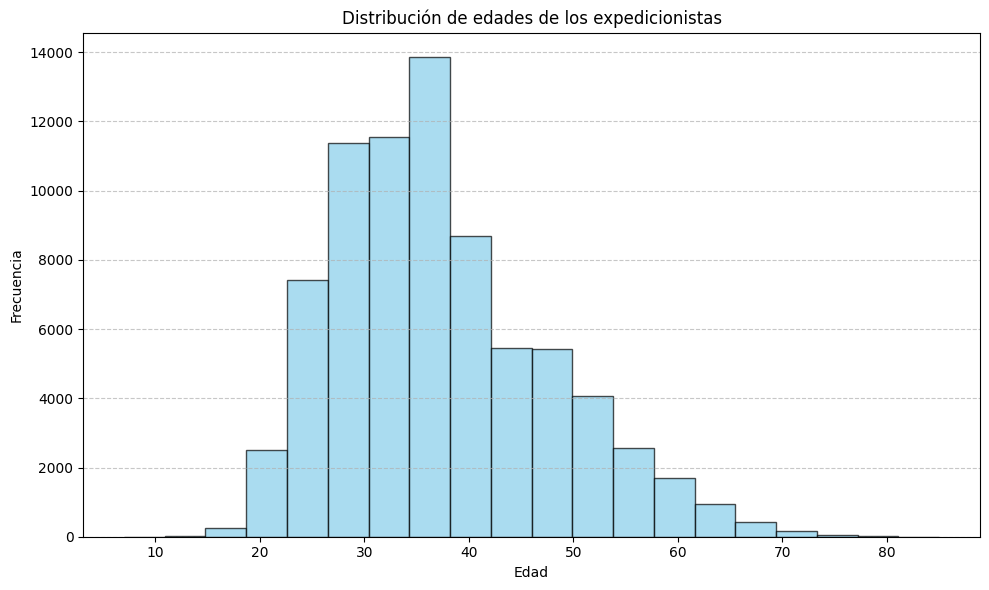

In [92]:
# Empezamos con el annálisis de las variables de manera gráfica
plt.figure(figsize=(10, 6))
plt.hist(members['age'], bins=20, edgecolor='black', color='skyblue', alpha=0.7)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de edades de los expedicionistas')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

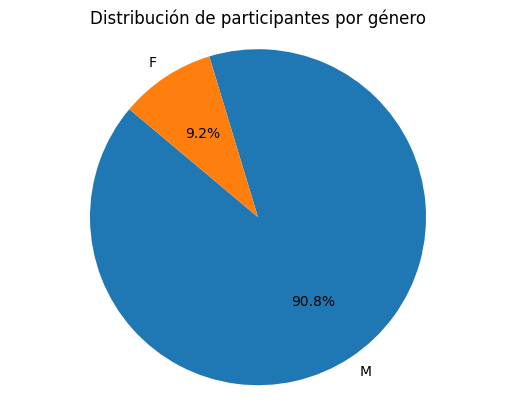

In [94]:
generos = members['sex'].value_counts()
plt.pie(generos, labels=generos.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribución de participantes por género')
plt.show()

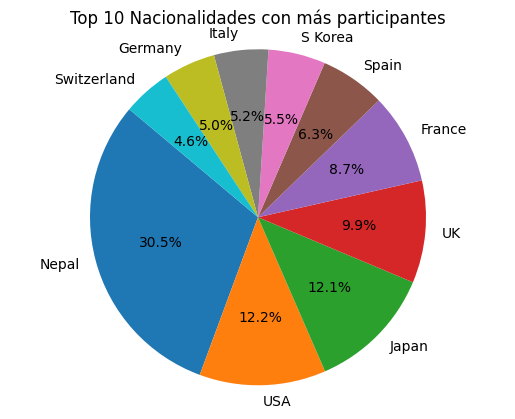

In [97]:
contador_nacionalidades = members['citizenship'].value_counts()
top_10_nacionalidades = contador_nacionalidades.head(10)
plt.pie(top_10_nacionalidades, labels=top_10_nacionalidades.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Top 10 Nacionalidades con más participantes')
plt.show()

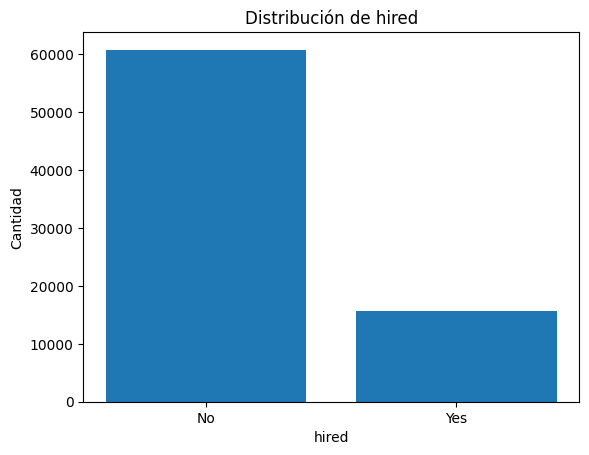

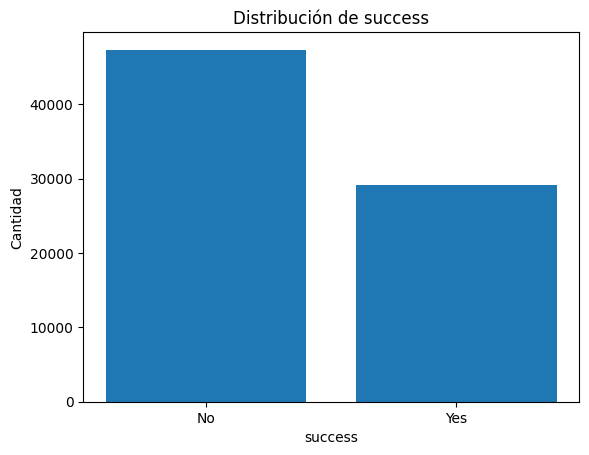

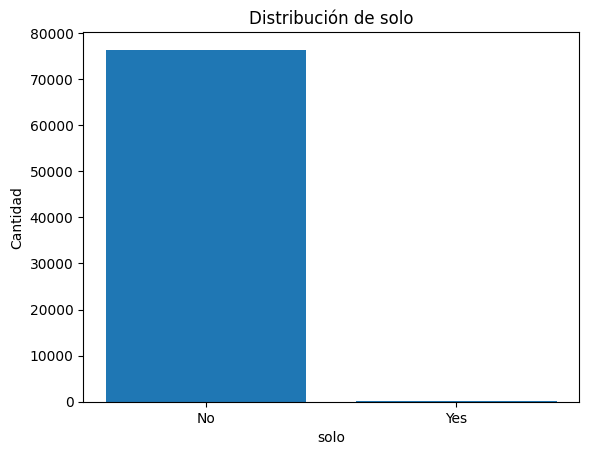

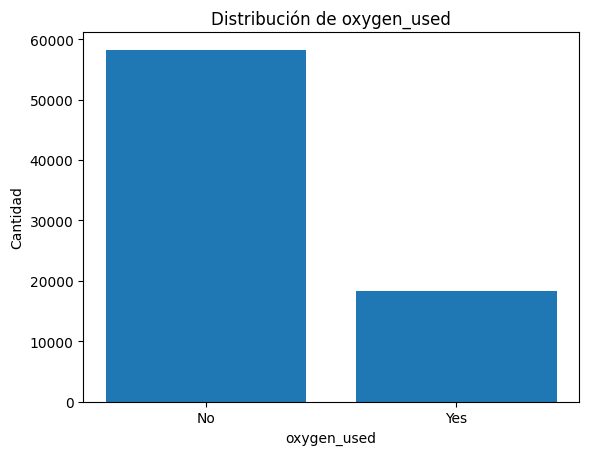

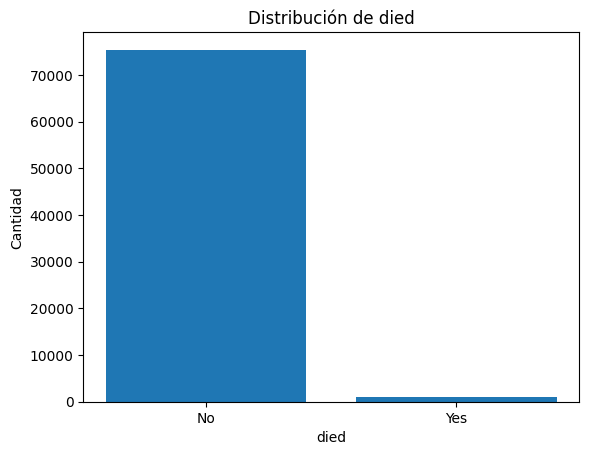

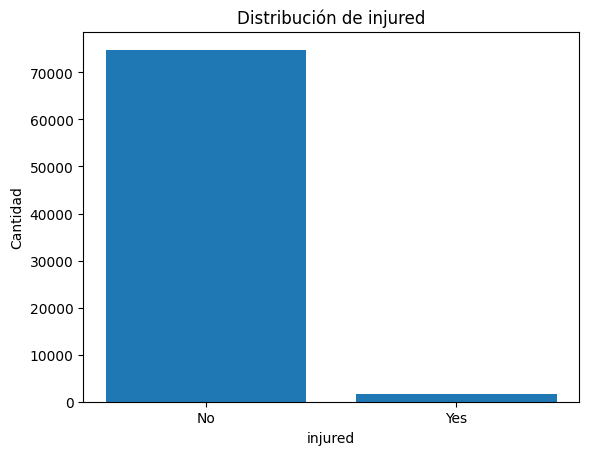

In [77]:
variables_si_o_no = ['hired', 'success', 'solo', 'oxygen_used', 'died', 'injured']
for var in variables_si_o_no:
    counts = members[var].value_counts()
    plt.bar(counts.index.astype(str), counts.values)
    plt.xlabel(var)
    plt.ylabel('Cantidad')
    plt.title(f'Distribución de {var}')
    plt.show()

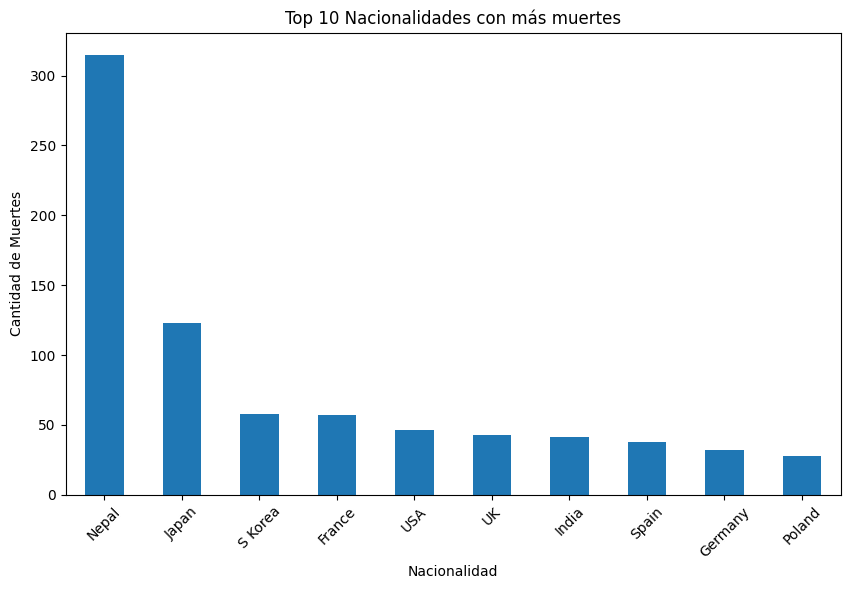

In [103]:
# Creamos la columna 'died'
fallecidos = members[members['died'] == 'Yes']

# Contamos las muertes por cada nacionalidad
contador_fallecidos = fallecidos['citizenship'].value_counts()

# Seleccionamos el top 10 nacionalidades con más muertes
top_10_contador_fallecidos = contador_fallecidos.head(10)

# Mostramos el gráfico de barras
plt.figure(figsize=(10, 6))
top_10_contador_fallecidos.plot(kind='bar')
plt.xlabel('Nacionalidad')
plt.ylabel('Cantidad de Muertes')
plt.title('Top 10 Nacionalidades con más muertes')
plt.xticks(rotation=45)
plt.show()

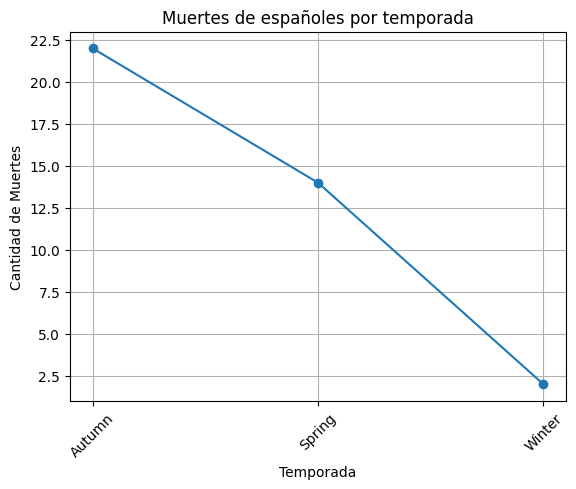

In [106]:
# Filtramos los datos de muertes de españoles
españoles_fallecidos = fallecidos[fallecidos['citizenship'] == 'Spain']

# Calculamos los fallecidos por temporada
fallecidos_por_temporada = españoles_fallecidos['season'].value_counts().sort_index()

plt.plot(fallecidos_por_temporada.index, fallecidos_por_temporada.values, marker='o')
plt.xlabel('Temporada')
plt.ylabel('Cantidad de Muertes')
plt.title('Muertes de españoles por temporada')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

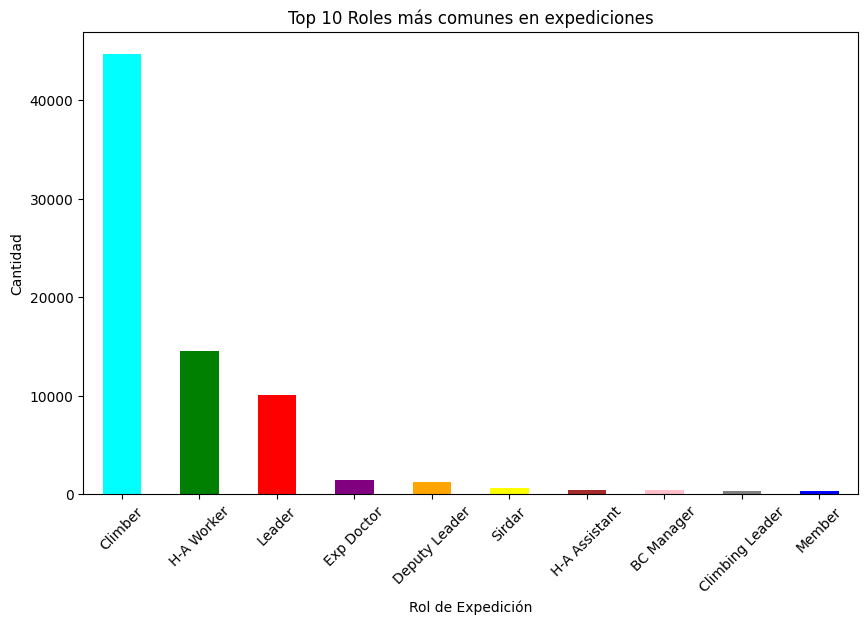

In [108]:
# Calculamos el top 10 de roles mas comunes de ver en expediciones
contador_roles = members['expedition_role'].value_counts()
top_10_roles = contador_roles.head(10)

colores = ['cyan', 'green', 'red', 'purple', 'orange', 'yellow', 'brown', 'pink', 'gray', 'blue']

plt.figure(figsize=(10, 6))
top_10_roles.plot(kind='bar', color=colores)
plt.xlabel('Rol de Expedición')
plt.ylabel('Cantidad')
plt.title('Top 10 Roles más comunes en expediciones')
plt.xticks(rotation=45)
plt.show()

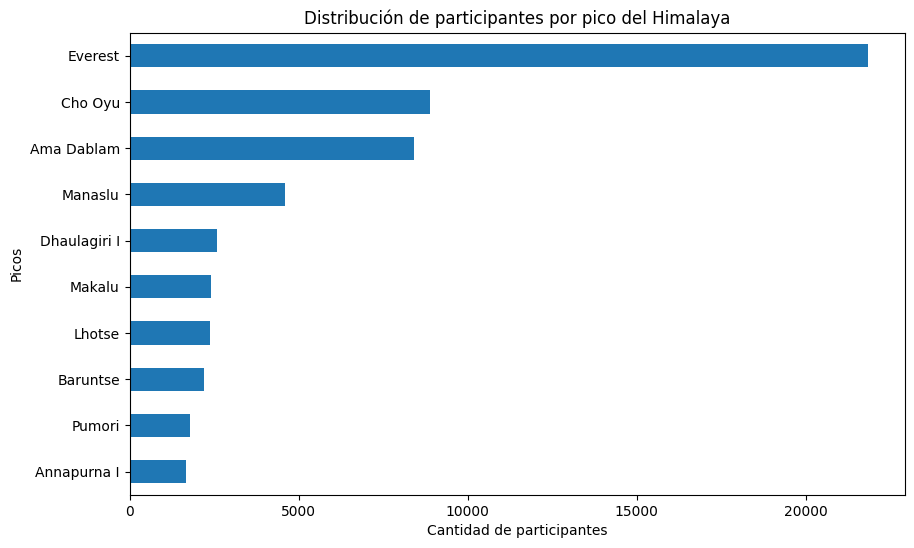

In [111]:
# Seleccionamos el total de participantes en las expediciones de los picos
contador_picos = members['peak_name'].value_counts().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
contador_picos.plot(kind='barh')
plt.xlabel('Cantidad de participantes')
plt.ylabel('Picos')
plt.title('Distribución de participantes por pico del Himalaya')
plt.gca().invert_yaxis()
plt.show()

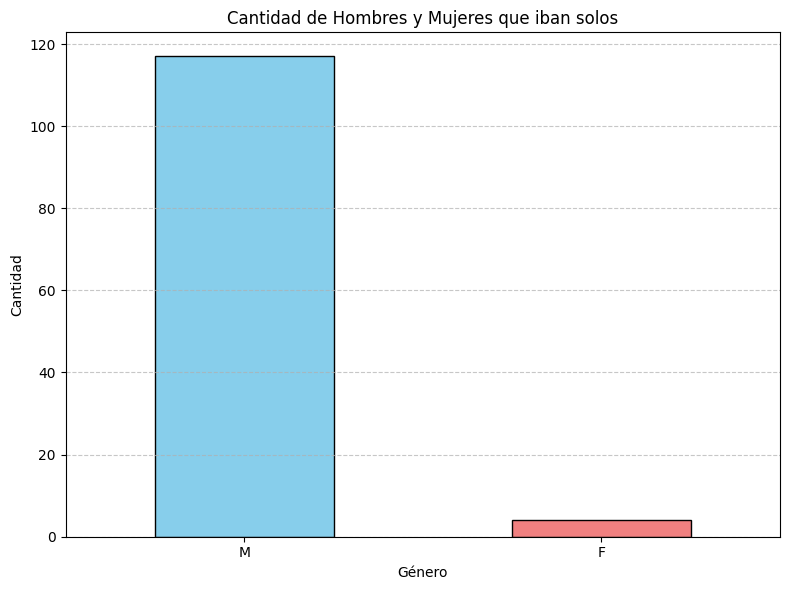

In [113]:
datos = members[members['solo'].notna() & members['sex'].notna()]
datos_solos = datos[datos['solo'] == 'Yes']
contador_solos_genero = datos_solos['sex'].value_counts()

plt.figure(figsize=(8, 6))
contador_solos_genero.plot(kind='bar', color=['skyblue', 'lightcoral'], edgecolor='black')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.title('Cantidad de Hombres y Mujeres que iban solos')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [84]:
top10_men = members[(members['peak_name']=='') | (members['sex']=='M')].head(11)
top10_men

,expedition_id,member_id,peak_id,peak_name,year,season,sex,age,citizenship,expedition_role,hired,success,solo,oxygen_used,died,injured
0,AMAD78301,AMAD78301-01,AMAD,Ama Dablam,1978,Autumn,M,40,France,Leader,No,No,No,No,No,No
1,AMAD78301,AMAD78301-02,AMAD,Ama Dablam,1978,Autumn,M,41,France,Deputy Leader,No,No,No,No,No,No
2,AMAD78301,AMAD78301-03,AMAD,Ama Dablam,1978,Autumn,M,27,France,Climber,No,No,No,No,No,No
3,AMAD78301,AMAD78301-04,AMAD,Ama Dablam,1978,Autumn,M,40,France,Exp Doctor,No,No,No,No,No,No
4,AMAD78301,AMAD78301-05,AMAD,Ama Dablam,1978,Autumn,M,34,France,Climber,No,No,No,No,No,No
5,AMAD78301,AMAD78301-06,AMAD,Ama Dablam,1978,Autumn,M,25,France,Climber,No,No,No,No,No,No
6,AMAD78301,AMAD78301-07,AMAD,Ama Dablam,1978,Autumn,M,41,France,Climber,No,No,No,No,No,No
7,AMAD78301,AMAD78301-08,AMAD,Ama Dablam,1978,Autumn,M,29,France,Climber,No,No,No,No,No,No
8,AMAD79101,AMAD79101-03,AMAD,Ama Dablam,1979,Spring,M,35,USA,Climber,No,No,No,No,No,No
9,AMAD79101,AMAD79101-04,AMAD,Ama Dablam,1979,Spring,M,37,W Germany,Climber,No,Yes,No,No,No,No


In [85]:
members_copy = members.copy()
members_copy.to_csv('members_copy.csv')

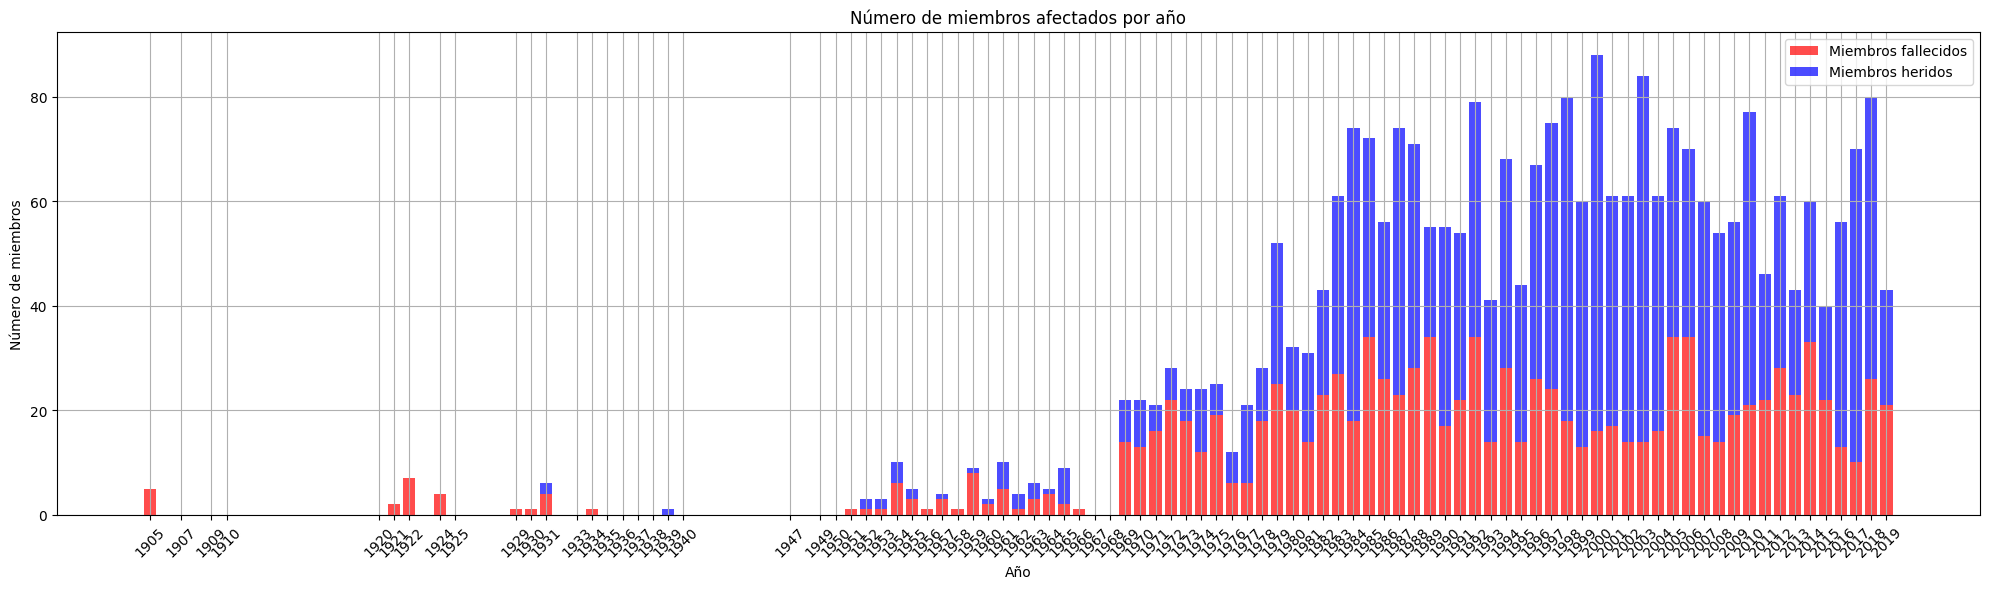

In [86]:
# Añadimos nuevamente el csv original y creamos un df nuevo para usarlo en esta grafica
miembros_fallecidos = pd.read_csv('members.csv')
miembros_fallecidos_filtrado = miembros_fallecidos[['year', 'died', 'injured']]

miembros_agrupados = miembros_fallecidos_filtrado.groupby('year').sum().reset_index()

plt.figure(figsize=(20, 6))
plt.bar(miembros_agrupados['year'], miembros_agrupados['died'], color='red', alpha=0.7, label='Miembros fallecidos')
plt.bar(miembros_agrupados['year'], miembros_agrupados['injured'], bottom=miembros_agrupados['died'], color='blue', alpha=0.7, label='Miembros heridos')
plt.xlabel('Año')
plt.ylabel('Número de miembros')
plt.title('Número de miembros afectados por año')
plt.legend()
plt.grid(True)
plt.xticks(miembros_agrupados['year'], rotation=45)
plt.tight_layout()
plt.show()


## 4. Mapa de las nacionalidades de los miembros

In [87]:
paises = {
         "Nepal": (28.3949, 84.1240),
         "Alemania": (51.1657, 10.4515),
         "Italia": (41.8719, 12.5674),
         "Suiza": (46.8182, 8.2275),
         "Corea del Sur": (35.9078, 127.7669),
         "España": (40.4637, -3.7492),
         "Francia": (46.6034, 1.8883),
         "Reino Unido": (55.3781, -3.4360),
         "Japón": (36.2048, 138.2529),
         "Estados Unidos": (37.0902, -95.7129)
}

mapa_paises = folium.Map(location=[20, 0], zoom_start=3.4)

for paises, coordenadas in paises.items():
    folium.Marker(
        location=coordenadas,
        popup=paises,
        icon=folium.Icon(icon="flag")
    ).add_to(mapa_paises)
    
mapa_paises

## 5. Pruebas estadisticas

### 5.1 Shapiro-Wilk

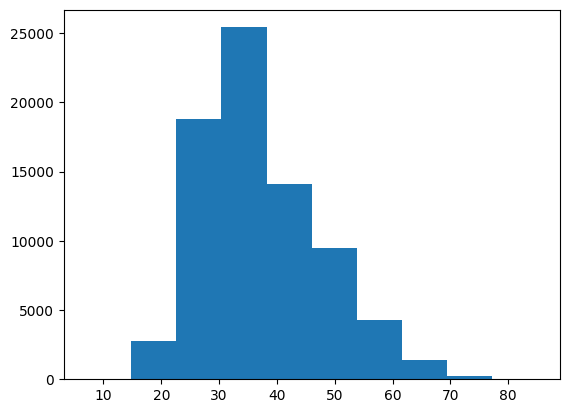

Estadístico=0.967316005509774, p-value=8.563871297403092e-79
La variable age no sigue una distribución normal


c:\Users\Alberto\Desktop\upgrade\mi_entorno\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 76519.
  res = hypotest_fun_out(*samples, **kwds)


In [88]:
# Para esta prueba, hemos decidido elegir la columna 'Age', ya que es la unica de esta dataset que presenta datos numericos y continuos, y por lo tanto, nos permitira evaluar si sigue una distribucion normal o no.
for col in ['age']:
    plt.hist(members[col])
    plt.show()
    stat, p = shapiro(members[col])
    print(f'Estadístico={stat}, p-value={p}')
    if p < 0.05:
        print(f'La variable {col} no sigue una distribución normal')
    else:
        print(f'La variable {col} sigue una distribución normal')

### 5.2 Chi-cuadrado

In [89]:
# Vamos a comparar las variables categoricas 'success' y 'citizenship', para comprobar la relacion entre el exito de una expidicion con la nacionalidad.
tabla_contingencia = pd.crosstab(members['citizenship'], members['success'])
chi2, p_value, dof, expected = chi2_contingency(tabla_contingencia)
print('Chi2:', chi2, 'P-value:', p_value)

if p_value < 0.05:
    print('Hay una relación significativa entre el éxito de una expedición y la nacionalidad')
else:
    print('No hay una relación significativa entre el éxito de una expedición y la nacionalidad')

Chi2: 7385.633908162398 P-value: 0.0
Hay una relación significativa entre el éxito de una expedición y la nacionalidad


In [90]:
# Vamos a comparar las variables categoricas 'season' y 'success', para comprobar la relacion entre el exito de una expidicion con la temporada del año.
tabla_contingencia2 = pd.crosstab(members['season'], members['success'])
chi2, p_value, dof, expected = chi2_contingency(tabla_contingencia2)
print('Chi2:', chi2, 'P-value:', p_value)

if p_value < 0.05:
    print('Hay una relación significativa entre el éxito de una expedición y la temporada del año')
else:
    print('No hay una relación significativa entre el éxito de una expedición y la temporada del año')

Chi2: 431.92417331754683 P-value: 3.50946821077056e-92
Hay una relación significativa entre el éxito de una expedición y la temporada del año


In [91]:
# Vamos a comparar las variables categoricas 'sex' y 'expedition_role', para comprobar la relacion entre el genero del expedicionista y el rol en la expedicion.
tabla_contingencia3 = pd.crosstab(members['sex'], members['expedition_role'])
chi2, p_value, dof, expected = chi2_contingency(tabla_contingencia3)
print('Chi2:', chi2, 'P-value:', p_value)

if p_value < 0.05:
    print('Hay una relación significativa entre el género del expedicionista y el rol en la expedición')
else:
    print('No hay una relación significativa entre el género del expedicionista y el rol en la expedición')

Chi2: 3682.732444392611 P-value: 0.0
Hay una relación significativa entre el género del expedicionista y el rol en la expedición
